# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover :

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Puttin it all together!

In [1]:
import numpy as np

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease=pd.read_csv("./data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target",axis=1)

# Create Y (labels)
y = heart_disease["target"]

In [4]:
import warnings
# warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [5]:
# 2. Choose the right model and hyperparamaters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importli

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.2 (default, Apr 14 2020, 19:01:40) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Adak\Desktop\sample_project_1\env\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
       pip: 20.0.2
setuptools: 46.1.3.post20200330
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.3
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [8]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
# Make a prediction (Wrong version!)
y_pwrong=clf.predict(np.array([1,2,3]))
y_pwrong

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Make a prediction
y_preds=clf.predict(X_test)
y_preds

In [ ]:
y_test

In [ ]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

In [ ]:
confusion_matrix(y_test,y_preds)

In [ ]:
accuracy_score(y_test,y_preds)

In [ ]:
# 5. Improve a model
# Try diffrent amount of n_estimators
np.random.seed(42)
for i in range(10,110,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set:{clf.score(X_test,y_test)*100:.2f}%")
    print("")

In [ ]:
# 6. Sace a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [ ]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

## What we're going to cover:

In [ ]:
# Let's listify the contents
what_were_covering=[
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

In [ ]:
what_were_covering

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels(usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding )

In [ ]:
heart_disease.head()

In [ ]:
X = heart_disease.drop("target",axis=1)
X.head()

In [ ]:
y=heart_disease["target"]
y.head()

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
X.shape[0]*0.8

In [ ]:
242+61

### 1.1 Make sure it's all numerical

In [ ]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

In [ ]:
len(car_sales)

In [ ]:
car_sales.dtypes

In [ ]:
# Split into X/y
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

# Split into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X


In [ ]:
X

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [ ]:
# let's refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

model.fit(X_train,y_train)

In [ ]:
X.head()

In [ ]:
model.score(X_test,y_test)

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [ ]:
# Import car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create X & y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
# Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

In [ ]:
car_sales_missing

In [ ]:
car_sales_missing["Doors"].value_counts()

#### Option 1: Fill missing data with Pandas

In [ ]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [ ]:
# Check our dataframe again
car_sales_missing.isna().sum()

In [ ]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

### Option 2: Fill missing values with Scikit-Learn

In [ ]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

In [ ]:
# Split into X & y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
X.isna().sum()

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Transform the data 
filled_X=imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled=pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
len(car_sales_filled)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

In [ ]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
len(car_sales_filled),len(car_sales)

In [ ]:
what_were_covering

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

Step 1 - Check the Scikit-Learn machine learning map... 
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

In [ ]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston

In [ ]:
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

In [ ]:
# How many samples?
len(boston_df)

In [ ]:
# Let's try the Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Ridge model
model=Ridge()
model.fit(X_train,y_train)

# Check the score of the Ridge model on test data
model.score(X_test,y_test)

How do we improve this score?

What if Ridge wasn't working?

Let's refer back to the map...
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Regressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test,y_test)

In [ ]:
# Check the Ridge model again
model.score(X_test,y_test)

### 2.2 Choosing and estimator for a classification problem

Let's go to the map...
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease.head()

In [ ]:
len(heart_disease)

Consulting the map and it says to try `LinearSVC`.

In [ ]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf=LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test,y_test)

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test,y_test)

Tidbit:
    1. If you have structured data , use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [ ]:
heart_disease

In [ ]:
what_were_covering

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [ ]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train,y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test,y_test)

In [ ]:
X.head()

In [ ]:
y.head()

### 3.2 Make Predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1,2,3,4,5])) # this doesn't work...

In [ ]:
X_test.head()

In [ ]:
clf.predict(X_test)

In [ ]:
np.array([y_test])

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

Make predictions with `predict_proba()`

In [ ]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

In [ ]:
X_test[:5]

In [ ]:
heart_disease["target"].value_counts()

`predict()` can also be used for regression models

In [ ]:
boston_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit model
model=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Make predictions 
y_preds=model.predict(X_test)

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

In [ ]:
what_were_covering

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

Let's do the same but for regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit model
model=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
model.score(X_train,y_train)

### 4.2 Evaluating a model using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train);

In [ ]:
clf.score(X_test,y_test)

In [ ]:
cross_val_score(clf,X,y,cv=5)

In [ ]:
cross_val_score(clf,X,y,cv=10)

In [ ]:
np.random.seed(42)

# Single training and test split score
clf_single_score=clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two
clf_single_score,clf_cross_val_score

In [ ]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf,X,y,cv=5,scoring=None)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)
cross_val_score=cross_val_score(clf,X,y,cv=5)

In [13]:
np.mean(cross_val_score)

0.8248087431693989

In [16]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [19]:
# Create X_test...
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)
# Make predictions with probabilites
y_probs=clf.predict_proba(X_test)

y_probs[:10],len(y_probs)

(array([[0.58, 0.42],
        [0.09, 0.91],
        [0.55, 0.45],
        [0.75, 0.25],
        [0.52, 0.48],
        [0.09, 0.91],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.14, 0.86],
        [0.39, 0.61]]),
 61)

In [24]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [25]:
# Calculate fpr,tpr and tresholds
fpr,tpr,tresholds=roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

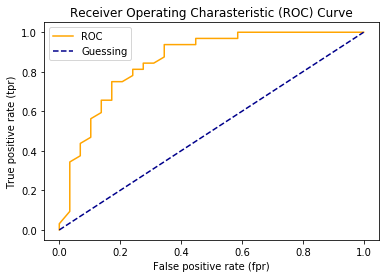

In [26]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # Plot linewith no predictive power(baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    # Customize the plot 
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Charasteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8561422413793104

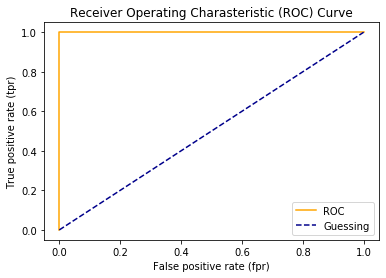

In [28]:
# Plot perfect ROC curve and AUC score
fpr,tpr,tresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [29]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0